### Assignment_1

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [8]:
# Read the data from the CSV file for the top 20 countries
df = pd.read_csv('C:\\Users\\Bindu\\Documents\\Arcada\\Visual_Analytics\\Assainments\\Ass1\\GDPDataForCountries.csv', delimiter=',', engine='python', skiprows=3)

# Select only the columns from 1973 to 2022 for the top 20 countries
years = [str(year) for year in range(1973, 2023)]  
selected_columns = ['Country Code'] + years  
df_Country_Code = df[selected_columns]

# Exclude rows for the continents
exclude_continents = [ 'ARB', 'CEB', 'EAP', 'ECA', 'ECS', 'EMU', 'EUU', 'FCS', 'HIC', 'IBD','MEA', 'FRA','IBT', 'IDA', 'IDB', 'LMY', 'LMC','SAS','TSA', 'LIC', 'LTE','ITA','BRA', 'MIC', 'OED', 'PST', 'PSE', 'TEA', 'TEC', 'UMC', 'WLD','NAC','EAS','EAR','LCN','TLA','LAC','GBR']
df_countries_only = df_Country_Code[~df_Country_Code['Country Code'].str.contains('|'.join(exclude_continents))]

# Set 'Country code' column as the index 
df_countries_only.set_index('Country Code', inplace=True)

# Calculate the total GDP for each country across the years for the top 20 countries
df_countries_only['Total GDP'] = df_countries_only.sum(axis=1)

# Select the 20 countries with the highest total GDP
top_20_richest_countries = df_countries_only.nlargest(20, 'Total GDP')

# Transpose the DataFrame for plotting (top 20)
top_20_transposed = top_20_richest_countries[years].transpose()

# Select the 5 countries with the highest total GDP
top_5_richest_countries = df_countries_only.nlargest(5, 'Total GDP')

# Transpose the DataFrame for plotting (top 5)
top_5_transposed = top_5_richest_countries[years].transpose()



C:\Users\Bindu\AppData\Local\Temp\ipykernel_19816\2825708038.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries_only['Total GDP'] = df_countries_only.sum(axis=1)


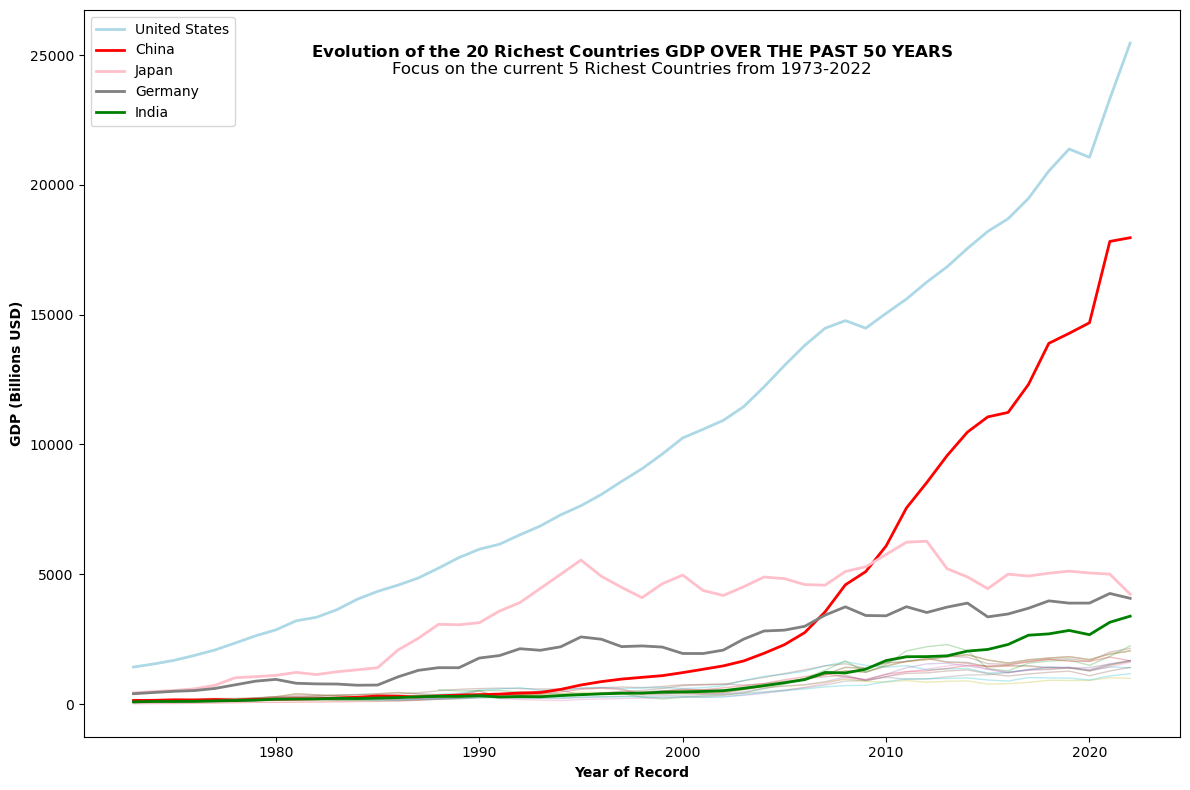

In [13]:
# Plotting the line chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot for top 20 countries with lighter color
for country in top_20_transposed.columns:
    ax1.plot(top_20_transposed.index, top_20_transposed[country] / 1e9, alpha=0.3, linestyle='-', linewidth=1)


# Plot for top 5 countries
country_name= ['United States', 'China','Japan','Germany', 'India']
colours_name= ['lightblue','r','pink','gray','g']
i=0
for country in top_5_transposed.columns:
    i=i+1
    ax1.plot(top_5_transposed.index, top_5_transposed[country] / 1e9, label= country_name[i-1],color=colours_name[i-1],linewidth=2)
    

# Set labels and titles
ax1.set_xlabel('Year of Record', fontdict=dict(weight='bold'))
ax1.set_ylabel('GDP (Billions USD)',fontdict=dict(weight='bold'))
plt.title(r"$\bf{Evolution\ of\ the\ 20\ Richest\ Countries\ GDP\ OVER\ THE\ PAST\ 50\ YEARS}$"+ "\nFocus on the current 5 Richest Countries from 1973-2022", y=0.9)

# Set ticks 
plt.xticks([str(year) for year in range(1980, 2030, 10)])

# labels
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(handles1, labels1, loc='upper left')


plt.tight_layout()
plt.show()